Nama anggota kelompok :

1. Fariz Abdussalam
2. Intan Azizah Putri

# Install and Load Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.power import TTestPower, TTestIndPower, GofChisquarePower
from statsmodels.stats.proportion import proportions_chisquare
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm

import scipy.stats

# Load Dataset

In [ ]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_experiment/marketing-clean.csv")

**Data Inspection and Exploration**

Check null values inside data

In [ ]:
raw_data.isna().sum()

user_id                0
date_served            0
marketing_channel      0
variant                0
converted              0
language_displayed     0
language_preferred     0
age_group              0
date_subscribed        0
date_canceled          0
subscribing_channel    0
is_retained            0
conversion             0
dtype: int64

In [ ]:
cat = raw_data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
raw_data["user_id"].value_counts().head()

a100000894    5
a100000893    5
a100000888    5
a100000889    5
a100000890    5
Name: user_id, dtype: int64

 Satu user bisa memiliki lebih dari 1 aktivitas di marketing channel yang sama untuk satu hari, untuk itu kita harus process agar kita memastikan bahwa satu user hanya ada satu aktivitas untuk satu marketing channel untuk satu variant dalam satu hari. diambil yang paling terakhir


In [ ]:
#example: user dengan jumlah visit ke satu marketing channel yang sama untuk sehari, untuk data2 seperti ini kita treat agar perhitungan jumlah usernya tidak salah
raw_data.loc[raw_data["user_id"]=="a100000894"]

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
332,a100000894,1/8/18,Instagram,control,True,English,English,24-30 years,1/8/18,4/2/18,Instagram,False,1
333,a100000894,1/12/18,Instagram,control,True,English,English,30-36 years,1/8/18,4/2/18,Instagram,False,1
334,a100000894,1/3/18,House Ads,control,False,English,English,30-36 years,1/8/18,4/2/18,Instagram,False,0
335,a100000894,1/3/18,House Ads,control,False,English,English,24-30 years,1/8/18,4/2/18,Instagram,False,0
336,a100000894,1/3/18,House Ads,control,False,English,English,30-36 years,1/8/18,4/2/18,Instagram,False,0


In [ ]:
#get latest activity per user, per day, per marketing channel, per variant
latest_activity = raw_data.groupby(['user_id', 'date_served','marketing_channel','variant']).last().reset_index()

In [ ]:
latest_activity.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
0,a100000040,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,1/18/18,House Ads,False,1
1,a100000041,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,2/22/18,House Ads,False,1
2,a100000042,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,3/9/18,House Ads,False,1
3,a100000043,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,2/18/18,House Ads,False,1
4,a100000044,1/1/18,House Ads,personalization,True,Arabic,Arabic,24-30 years,1/1/18,3/3/18,House Ads,False,1


In [ ]:
latest_activity["user_id"].value_counts().head(n=10)

a100000893    5
a100000888    5
a100000890    5
a100000891    5
a100000892    5
a100000875    4
a100000889    4
a100000993    3
a100000871    3
a100000872    3
Name: user_id, dtype: int64

In [ ]:
#cek apakah data user yang memiliki lebih dari satu baris data itu hanya datang dari masing2 satu marketing channel dengan satu variant
latest_activity.loc[raw_data["user_id"]=="a100000893"]

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
327,a100000893,1/2/18,Facebook,control,False,English,English,24-30 years,1/7/18,4/1/18,Instagram,False,0
328,a100000893,1/2/18,House Ads,control,False,English,English,19-24 years,1/7/18,4/1/18,Instagram,False,0
329,a100000893,1/3/18,House Ads,control,False,English,English,24-30 years,1/7/18,4/1/18,Instagram,False,0
330,a100000893,1/7/18,Instagram,control,True,English,English,19-24 years,1/7/18,4/1/18,Instagram,False,1
331,a100000894,1/12/18,Instagram,control,True,English,English,30-36 years,1/8/18,4/2/18,Instagram,False,1


# NOMOR 1

**Lakukan eksplorasi dengan visual dan interpretasi pada data yang diberikan:**

## a. Jumlah user per marketing channel

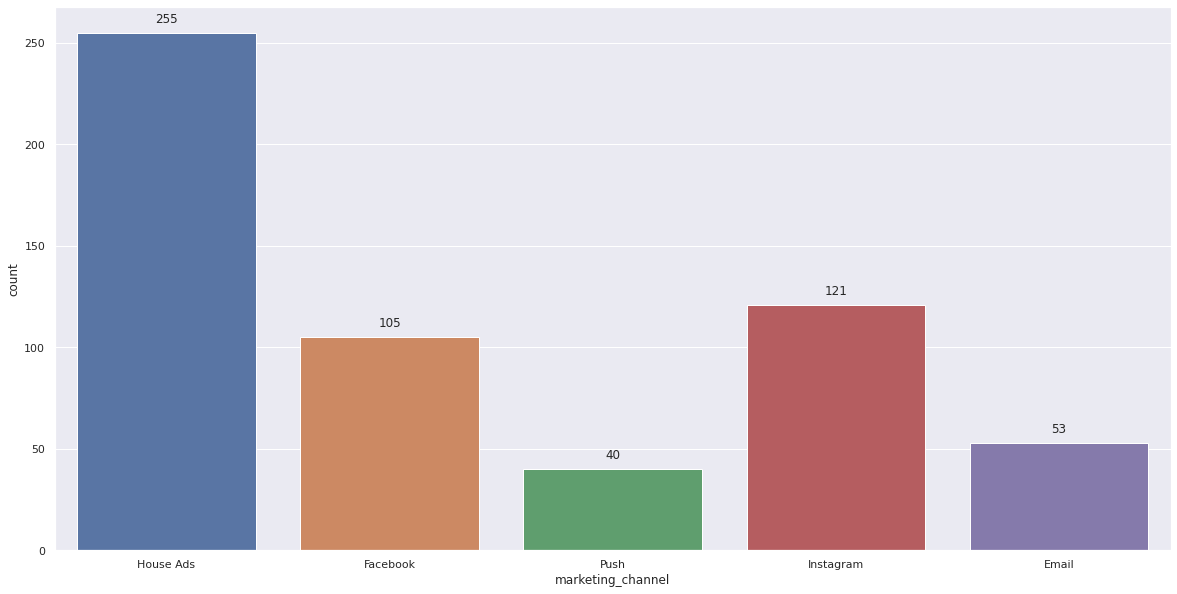

In [ ]:
plot_fe = sns.countplot(x = 'marketing_channel', data = latest_activity)
for p in plot_fe.patches:
  height = p.get_height() # get the height of each bar
  # adding text to each bar
  plot_fe.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
  y = height+5, # y-coordinate position of data label, padded 0.2 above bar
  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
  ha = 'center') # sets horizontal alignment (ha) to center

Marketing channel yang paling banyak digunakan untuk oleh user adalah House Ads dengan jumlah 255 user.

## b. Jumlah user per variant

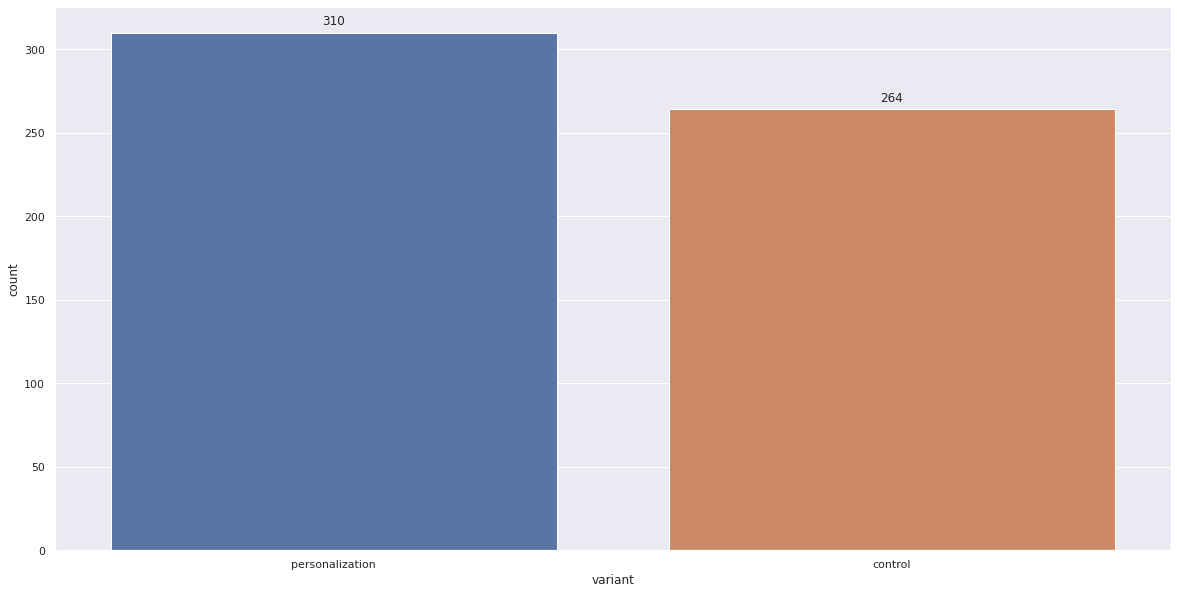

In [ ]:
plot_fe = sns.countplot(x = 'variant', data = latest_activity)
for p in plot_fe.patches:
  height = p.get_height() # get the height of each bar
  # adding text to each bar
  plot_fe.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
  y = height+5, # y-coordinate position of data label, padded 0.2 above bar
  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
  ha = 'center') # sets horizontal alignment (ha) to center

Jumlah user yang diberi iklan personalisasi lebih banyak daripada iklan biasa. 310 vs 264

## c. Jumlah user converted per variant

In [ ]:
def prop_agg(df, y, x):
  temp_df = df.groupby([y,x], as_index = False).size()
  temp_df['prop'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
  return temp_df

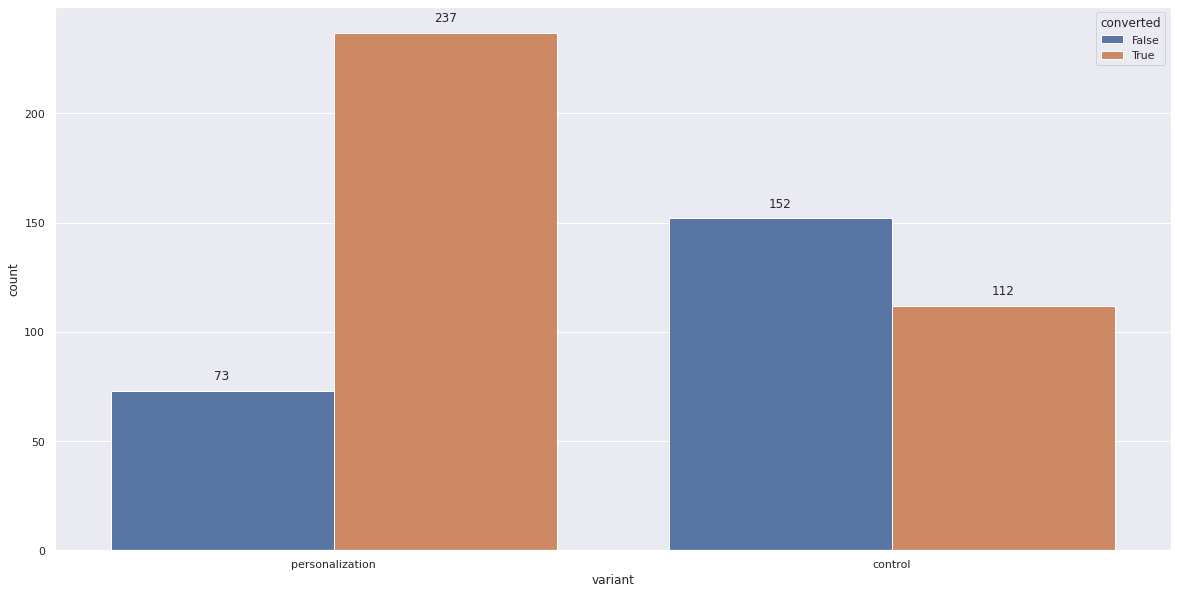

In [ ]:
plot_fe = sns.countplot(x = 'variant', hue = "converted" , data = latest_activity)
for p in plot_fe.patches:
  height = p.get_height() # get the height of each bar
  # adding text to each bar
  plot_fe.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
  y = height+5, # y-coordinate position of data label, padded 0.2 above bar
  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
  ha = 'center') # sets horizontal alignment (ha) to center

Treatment iklan personalisasi memiliki konversi yang lebih tinggi (237 vs 112) dibandingkan yang tidak diberi treatment artinya ada dampak dari pemberian treatment.

## d. Jumlah user converted per variant dari waktu ke waktu

In [ ]:
pd.to_datetime(pd.to_datetime(latest_activity['date_served']).dt.normalize(),unit="D")

0     2018-01-01
1     2018-01-01
2     2018-01-01
3     2018-01-01
4     2018-01-01
         ...    
569   2018-01-17
570   2018-01-17
571   2018-01-17
572   2018-01-17
573   2018-01-17
Name: date_served, Length: 574, dtype: datetime64[ns]

In [ ]:
# create Order Date column
latest_activity['date_served'] = pd.to_datetime(latest_activity['date_served']).dt.date

In [ ]:
#jumlah user converted per variant
daily_converted = latest_activity.groupby(['date_served','variant'])["converted"].sum().reset_index()

In [ ]:
daily_converted.columns = ["date","variant","converted"]

In [ ]:
daily_converted.head()

,date,variant,converted
0,2018-01-01,control,0
1,2018-01-01,personalization,8
2,2018-01-02,control,0
3,2018-01-02,personalization,11
4,2018-01-03,control,1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


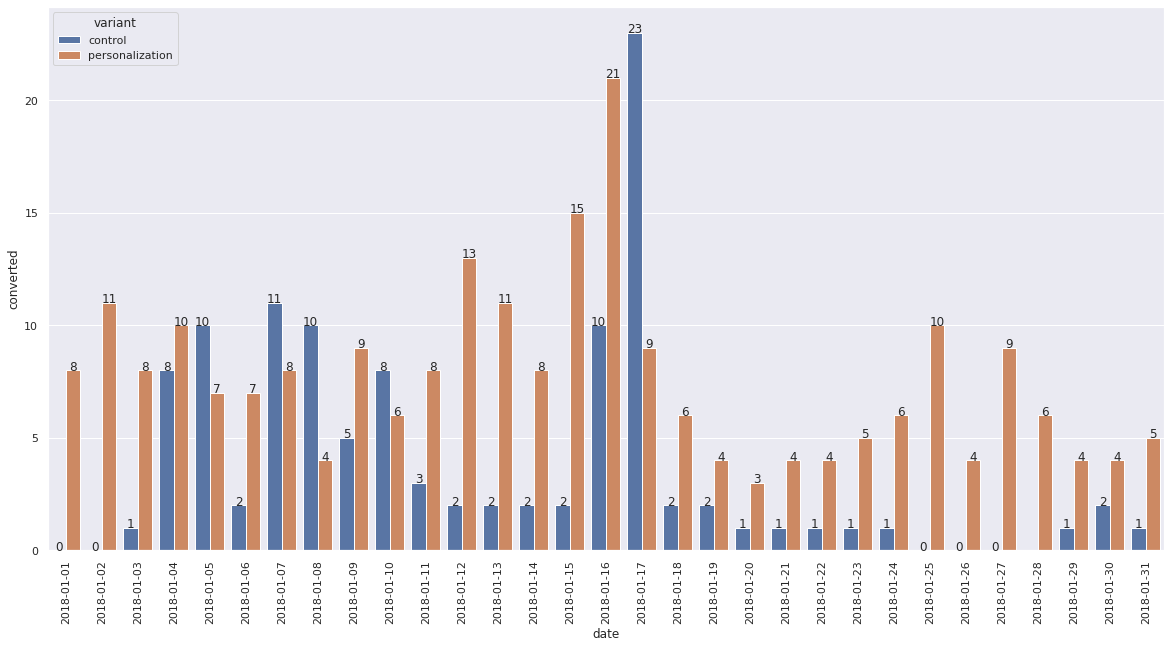

In [ ]:
plot_fe = sns.barplot(data=daily_converted, x="date", y="converted", hue="variant")
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)
for p in plot_fe.patches:
  height = p.get_height() # get the height of each bar
  # adding text to each bar
  plot_fe.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
  y = height, # y-coordinate position of data label, padded 0.2 above bar
  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
  ha = 'center') # sets horizontal alignment (ha) to center

Meskipun secara garis besar jumlah convert dari variant treatment lebih besar, entah kenapa di tanggal 17 varian control malah lebih mendapatkan banyak user yang convert ketimbang varian treatmen

## e. Jumlah user converted per age group

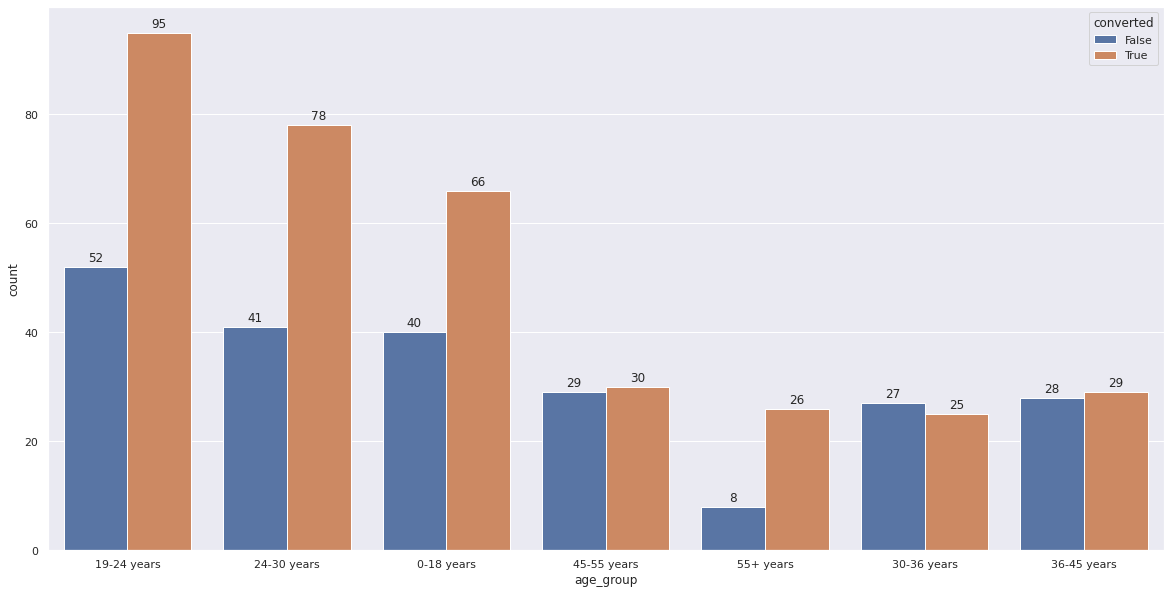

In [ ]:
plot_fe = sns.countplot(x = 'age_group', hue = "converted" , data = latest_activity)
for p in plot_fe.patches:
  height = p.get_height() # get the height of each bar
  # adding text to each bar
  plot_fe.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
  y = height+1, # y-coordinate position of data label, padded 0.2 above bar
  s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
  ha = 'center') # sets horizontal alignment (ha) to center

1. Grup umur yang memiliki nilai konversi tertinggi yaitu pada umur 19-24 tahun sebanyak 95 users,
2. rata2, jumlah user yang converted lebih tinggi untuk usia dibawah 30 tahun daripada usia diatas 30 tahun
3. grup umur diatas 30 tahun memiliki jumlah user converted yang mirip (sekitar 25-30) 
4. kesimpulannya, kampanye marketing kita lebih sukses untuk kaum pemuda dibawah 30 tahu
5. rekomendasinya adalah kita terapkan uji statistik pada setiap age group untuk memastikan mana varian terbaik untuk setiap age_group

## f. Korelasi prefered language dan converted

to check correlation between preferred language and converted using crammer V coefficient, and pearson correlation coefficient




In [ ]:
import scipy.stats as ss

def cramers_corrected_stat(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
      print("First variable is constant")
    elif len(y.value_counts())==1:
      print("Second variable is constant")
    else:   
      conf_matrix=pd.crosstab(x, y)

    if conf_matrix.shape[0]==2:
      correct=False
    else:
      correct=True

    chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

    n = sum(conf_matrix.sum())
    phi2 = chi2/n
    r,k = conf_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)


In [ ]:
cramers_corrected_stat(latest_activity["language_preferred"],latest_activity["converted"])

0.150185

Crammer V coefficient shows a low correlation score

In [ ]:
language_preferred_map={"English":0, "Arabic":1, "German":2, "Spanish":3}
latest_activity["language_preferred"]=latest_activity["language_preferred"].map(language_preferred_map)
latest_activity.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,conversion
0,a100000040,2018-01-01,House Ads,personalization,True,English,0,19-24 years,1/1/18,1/18/18,House Ads,False,1
1,a100000041,2018-01-01,House Ads,personalization,True,Arabic,1,24-30 years,1/1/18,2/22/18,House Ads,False,1
2,a100000042,2018-01-01,House Ads,personalization,True,English,0,0-18 years,1/1/18,3/9/18,House Ads,False,1
3,a100000043,2018-01-01,House Ads,personalization,True,English,0,19-24 years,1/1/18,2/18/18,House Ads,False,1
4,a100000044,2018-01-01,House Ads,personalization,True,Arabic,1,24-30 years,1/1/18,3/3/18,House Ads,False,1


In [ ]:
latest_activity[["language_preferred","converted"]].corr()

,language_preferred,converted
language_preferred,1.000000,0.059483
converted,0.059483,1.000000


Korelasi preferred language dan converted cukup rendah yaitu sebesar 0.05(Person correlation) dan 0.15 (Crammer V)  artinya preferred language memiliki asosiasi rendah terhadap converted.

# NOMOR 2

**Lakukan pengujian A/B testing untuk menunjukkan bahwa terdapat perbedaan signifikan berdasarkan jumlah konversi antara iklan baru dengan iklan lama. Perhatikan dengan baik aksi terakhir yang dilakukan tiap user!**

## A/B testing for all age_groups and all marketing channel in general

**Using Proportion Test (Chi-Square) for Count Data**

Calculate conversion for each variant

In [ ]:
raw_data = latest_activity

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              574 non-null    object
 1   date_served          574 non-null    object
 2   marketing_channel    574 non-null    object
 3   variant              574 non-null    object
 4   converted            574 non-null    bool  
 5   language_displayed   574 non-null    object
 6   language_preferred   574 non-null    int64 
 7   age_group            574 non-null    object
 8   date_subscribed      574 non-null    object
 9   date_canceled        574 non-null    object
 10  subscribing_channel  574 non-null    object
 11  is_retained          574 non-null    bool  
 12  conversion           574 non-null    int64 
dtypes: bool(2), int64(2), object(9)
memory usage: 50.6+ KB


In [ ]:
def conv_calc(df):
  conv_calculation = df.groupby(
    ['variant', 'converted'], as_index = False
).size().pivot(
    index='variant', columns = "converted", values = "size"
).reset_index()
  conv_calculation = conv_calculation.fillna(0)
  conv_calculation = conv_calculation.assign(
    conv_percent = lambda x: x[True] * 100 / (x[True] + x[False])
).assign(
    total_sample = lambda x: x[True] + x[False])

  return conv_calculation

In [ ]:
conv_calculation = conv_calc(raw_data)

Check calculation result

In [ ]:
conv_calculation 

converted,variant,False,True,conv_percent,total_sample
0,control,152,112,42.424242,264
1,personalization,73,237,76.451613,310


Calculate uplift of B

In [ ]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean  - a_mean)/ a_mean
  
    return str(round(lift*100, 2)) + '%'

In [ ]:
conv_A = conv_calculation[conv_calculation['variant'] == 'control']['conv_percent'].values
conv_B = conv_calculation[conv_calculation['variant'] == 'personalization']['conv_percent'].values

In [ ]:
lift(conv_A,conv_B)

'80.21%'

We see there are 80% uplift of B compared to A

Do chi-squared test

In [ ]:
# find number of succession
success = conv_calculation[['total_sample', True]].values[:,1]
# find number of all observations
obs = conv_calculation[['total_sample', True]].values[:,0]

In [ ]:
success

array([112, 237])

In [ ]:
result = proportions_chisquare(success, obs)

In [ ]:
# Calculate chi squared result
print('X-squared: %.3f' % result[0])
print('p-value: %.3f' % result[1])

X-squared: 69.267
p-value: 0.000


**Interpretation**

- Variant control has 112 conversions compared to variant personalization has 237
- Relative uplift of personalization (76.45%) from control (41.95%) around 82.26%
- p-value computed is 0.000 < 0.05, hence there is strong statistical significance in test results. Then, we should reject null hypothesis and proceed to launch variant personalization, but for young adults or for older customers? We need to another A/B testing for each age group

## A/B testing for each age group

In [ ]:
# seperate data for young adults and elders
marketing = raw_data

In [ ]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
    for subsegment in np.unique(marketing[segment]):
        print(subsegment)   
        # Limit marketing to email and subsegment      
        df = marketing[(marketing[segment] == subsegment)]
        conv_calculation = conv_calc(df)
        conv_A = conv_calculation[conv_calculation['variant'] == 'control']['conv_percent'].values
        conv_B = conv_calculation[conv_calculation['variant'] == 'personalization']['conv_percent'].values
        # find number of succession
        success = conv_calculation[['total_sample', True]].values[:,1]
        # find number of all observations
        obs = conv_calculation[['total_sample', True]].values[:,0]
        result = proportions_chisquare(success, obs)
        print('lift:', lift(conv_A, conv_B))
        # Calculate chi squared result
        #print('X-squared: %.3f' % result[0])
        print('p-value: %.3f' % result[1])
        print("########")

In [ ]:
from scipy import stats
ab_segmentation('age_group')

0-18 years
lift: 81.9%
p-value: 0.001
########
19-24 years
lift: 99.38%
p-value: 0.000
########
24-30 years
lift: 98.28%
p-value: 0.000
########
30-36 years
lift: 135.71%
p-value: 0.002
########
36-45 years
lift: 97.37%
p-value: 0.011
########
45-55 years
lift: 104.86%
p-value: 0.006
########
55+ years
lift: -7.11%
p-value: 0.702
########


Interpretation

Among age groups, our personalisation variant is not better than control variant and vice versa (p_value > 0.05), therefore we can keep control variant for age group 55+ years

Lets do another ab testing for each marketing channel after we exclude age >55 years

## A/B testing for each marketing channel

In [ ]:
def is_young(ag):
  if ag in ['55+ years']:
    return 0
  else:
    return 1

In [ ]:

raw_data["is_young"]=raw_data["age_group"].apply(is_young)

In [ ]:
marketing = raw_data.loc[raw_data["is_young"]==1]

In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 573
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              540 non-null    object
 1   date_served          540 non-null    object
 2   marketing_channel    540 non-null    object
 3   variant              540 non-null    object
 4   converted            540 non-null    bool  
 5   language_displayed   540 non-null    object
 6   language_preferred   540 non-null    int64 
 7   age_group            540 non-null    object
 8   date_subscribed      540 non-null    object
 9   date_canceled        540 non-null    object
 10  subscribing_channel  540 non-null    object
 11  is_retained          540 non-null    bool  
 12  conversion           540 non-null    int64 
 13  is_young             540 non-null    int64 
dtypes: bool(2), int64(3), object(9)
memory usage: 55.9+ KB


In [ ]:
ab_segmentation('marketing_channel')

Email
lift: -27.59%
p-value: 0.010
########
Facebook
lift: 616.51%
p-value: 0.000
########
House Ads
lift: 7.3%
p-value: 0.607
########
Instagram
lift: 278.67%
p-value: 0.000
########
Push
lift: 1178.26%
p-value: 0.000
########


Interpration:
Based on statistical test on each marketing channel, we can see that variant personalisation for email is actually worst then variant control, and our a/b testing experiment failed for House Ads marketing channel

Recommendation : 


1.   we stop using variant personalisation for email marketing channel
2.   We deep dive to explore why our experiment on House Ads failed, maybe it is related with language preference and language displayed



# NOMOR 3

**Buatlah presentasi berdasarkan hasil riset anda disertai dengan actionable insights/rekomendasi berdasarkan hasil analisis**

Link GSlide : https://docs.google.com/presentation/d/1ppvHt8e139JcPLdC-qN36PAVaOlrtRYu_908VcDGZ_s/edit?usp=sharing